# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

### Note from Henry: 
- The questions have been answered programmatically throughout the notebook. In order to find a section to a question, you can search for the question to move to the answer section. 
-------
### Model generation and validation exercises at bottom of notebook
---


1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

2. Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

### Data Cleaning Elements

In [317]:
import pandas as pd

url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv"
#Fallback method
df_mkt = pd.read_csv('raw_marketing_analysis.csv')
#df_mkt = pd.read_csv(url)
df_mkt.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [318]:
"""
TODO:
- Remove unnamed column (function library)
- lowercase all column names and replace space with _. (function library)
- inspect for value_counts including nan values. (manual)
- inspect for duplicate rows, particularly on customer row (unique key) (manual)

- Determine action for NaN state rows. (remove) 
- fill response NaN values with a No per default (happens at same time as state NaN removal)
- format effective_to_date date as datetime dtype. Looks like Month/Day/Year (use datetime library)
- determine action for NaN number_of_open_complaints
- Sort vehicle class values and determine action for NaN values in vehicle_class
- What to do for vehicle_type?

"""

'\nTODO:\n- Remove unnamed column (function library)\n- lowercase all column names and replace space with _. (function library)\n- inspect for value_counts including nan values. (manual)\n- inspect for duplicate rows, particularly on customer row (unique key) (manual)\n\n- Determine action for NaN state rows. (remove) \n- fill response NaN values with a No per default (happens at same time as state NaN removal)\n- format effective_to_date date as datetime dtype. Looks like Month/Day/Year (use datetime library)\n- determine action for NaN number_of_open_complaints\n- Sort vehicle class values and determine action for NaN values in vehicle_class\n- What to do for vehicle_type?\n\n'

In [319]:
for col in df_mkt.columns:
    print(df_mkt[col].value_counts(dropna=False))

Unnamed: 0
0        1
7276     1
7268     1
7269     1
7270     1
        ..
3638     1
3639     1
3640     1
3641     1
10909    1
Name: count, Length: 10910, dtype: int64
Customer
ID89933    7
DQ50258    5
AM79057    5
FP86246    5
KE35335    4
          ..
VW27730    1
ZX64745    1
CK24264    1
IX18485    1
WA60547    1
Name: count, Length: 9134, dtype: int64
State
California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
NaN            631
Name: count, dtype: int64
Customer Lifetime Value
7507.455372     11
5504.139033     11
5181.620895     10
13727.799720    10
5332.462694     10
                ..
3467.323976      1
14140.558850     1
20018.204590     1
7432.299921      1
11971.977650     1
Name: count, Length: 8041, dtype: int64
Response
No     8813
Yes    1466
NaN     631
Name: count, dtype: int64
Coverage
Basic       6660
Extended    3265
Premium      985
Name: count, dtype: int64
Education
Bachelor                3272
College             

In [320]:
import dataframe_cleaning_function_library as plib
df_mkt = plib.unnamed_col_remover(df_mkt)
df_mkt = plib.column_renamer(df_mkt)
df_mkt.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [321]:
df_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10279 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10279 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

In [322]:
display((df_mkt.isna().sum()/df_mkt.shape[0])*100)
display(df_mkt.duplicated().sum())

customer                          0.000000
state                             5.783685
customer_lifetime_value           0.000000
response                          5.783685
coverage                          0.000000
education                         0.000000
effective_to_date                 0.000000
employmentstatus                  0.000000
gender                            0.000000
income                            0.000000
location_code                     0.000000
marital_status                    0.000000
monthly_premium_auto              0.000000
months_since_last_claim           5.802016
months_since_policy_inception     0.000000
number_of_open_complaints         5.802016
number_of_policies                0.000000
policy_type                       0.000000
policy                            0.000000
renew_offer_type                  0.000000
sales_channel                     0.000000
total_claim_amount                0.000000
vehicle_class                     5.701192
vehicle_siz

37

In [323]:
# Removing rows from dataset where state is NaN. 
df_mkt = df_mkt.dropna(subset='state', ignore_index=True)

df_mkt = df_mkt.dropna(subset=['vehicle_class', 'vehicle_size'], ignore_index=True)

# Removing duplicate rows based on matching values from ['customer', 'state', 'coverage', 'number_of_policies', 'total_claim_amount'] 
df_mkt = df_mkt.loc[df_mkt.duplicated(subset=['customer', 'state', 'coverage', 'number_of_policies', 'total_claim_amount'])
           == False]
df_mkt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, 0 to 9687
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   int64 

In [324]:
# has to be a tuple for below function to accept it
values_to_replace_vclass = (('vehicle_class', {'Sports Car':'Luxury', 'Luxury SUV':'Luxury', 'Luxury Car':'Luxury'}),)

def value_replacer(df: pd.DataFrame, cols_and_vals):
    """
    Function to replace specific values (illformatted or incorrect) with desired values in specific dataframe columns
    Inputs: dataframe, dict with column name and KVPs for values.
    Output: dataframe
    """
    df2 = df.copy()
    for i in cols_and_vals:
        col_name = i[0]
        values = i[1]
        df2[col_name] = df2[col_name].replace(values)
    return df2

In [325]:
# replacing the values for vehicle class based on previous exercises. 
values_to_replace_vclass = (('vehicle_class', {'Sports Car':'Luxury', 'Luxury SUV':'Luxury', 'Luxury Car':'Luxury'}),)

df_mkt = value_replacer(df_mkt, values_to_replace_vclass)

In [326]:
# Vehicle type value which is not NaN is 'A'; assuming this is automatic. Filling NaN values with 'M' for manual
df_mkt['vehicle_type'] = df_mkt['vehicle_type'].fillna('M')
df_mkt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, 0 to 9687
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   int64 

In [327]:
df_mkt = plib.na_replace_with_descriptive_stat(df_mkt,
                                      ['number_of_open_complaints', 'months_since_last_claim'], method='mode')
df_mkt.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

In [328]:
# Putting effective_to_date into datetime format. 
df_mkt['effective_to_date'] = pd.to_datetime(df_mkt['effective_to_date'], format="%m/%d/%y", dayfirst=True)
df_mkt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, 0 to 9687
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status        

In [329]:
cleaned_df_mkt = df_mkt.copy()

---
1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.



In [330]:
new_df = df_mkt.loc[(df_mkt['total_claim_amount'] > 1000.00) 
                    & (df_mkt['response'] == "Yes")]
new_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
173,OK31456,California,11009.130490,Yes,Premium,Bachelor,2011-01-24,Employed,F,51643,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Agent,1358.400000,Luxury,Medsize,M
216,YJ16163,Oregon,11009.130490,Yes,Premium,Bachelor,2011-01-24,Employed,F,51643,...,0.0,1,Special Auto,Special L3,Offer2,Agent,1358.400000,Luxury,Medsize,A
380,GW43195,Oregon,25807.063000,Yes,Extended,College,2011-02-13,Employed,F,71210,...,1.0,2,Personal Auto,Personal L2,Offer1,Branch,1027.200000,Luxury,Small,A
401,IP94270,Arizona,13736.132500,Yes,Premium,Master,2011-02-13,Disabled,F,16181,...,0.0,8,Personal Auto,Personal L2,Offer1,Web,1261.319869,SUV,Medsize,A
532,FJ28407,California,5619.689084,Yes,Premium,High School or Below,2011-01-26,Unemployed,M,0,...,0.0,1,Personal Auto,Personal L1,Offer2,Web,1027.000029,SUV,Medsize,A


---
2. Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

In [331]:
df_mkt_pivot = df_mkt.pivot_table(index=['response'],columns=['policy_type', 'gender'],
                   values=['total_claim_amount'], aggfunc='mean')
df_mkt_pivot

total_claim_amount                                        \
policy_type     Corporate Auto             Personal Auto               
gender                       F           M             F           M   
response                                                               
No                  393.274491  471.538444    408.249682  456.142159   
Yes                 431.480117  412.756888    454.089997  453.603715   

                                      
policy_type Special Auto              
gender                 F           M  
response                              
No            452.211509  429.225788  
Yes           455.648867  414.799291

### Conclusions: 
- for men in the corporate auto segment, they have the lowest average claim amount
- men in Personal Auto segment have the highest average total claim amount out of the queried users. 
- The Personal auto segment is the only segment where men have higher average total claim amount relative to women.
- the segment where men and women's average total claim amount is the closest skewed is Personal Auto. 

---
3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

In [332]:
df_mkt['state'].value_counts()

state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

In [333]:
policy_per_state_df = df_mkt.groupby('state')['customer'].count().reset_index()
policy_per_state_df.loc[policy_per_state_df['customer'] > 500]

# I think the df cleaning has removed states where there would be less than 500 customers. 

,state,customer
0,Arizona,1703
1,California,3150
2,Nevada,882
3,Oregon,2601
4,Washington,798


4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [334]:
edu_mkt_df = df_mkt.groupby(['education', 'gender'])['customer_lifetime_value'].agg(['max', 'min', 'median'])
edu_mkt_df.head()

max          min       median
education gender                                       
Bachelor  F       73225.95652  1904.000852  5678.050167
          M       67907.27050  1898.007675  5555.830205
College   F       61850.18803  1898.683686  5621.789489
          M       61134.68307  1918.119700  5989.773931
Doctor    F       44856.11397  2395.570000  5332.462694

### Conclusions: 
- Doctor level educated men and women has the lowest overall maximum, followed by masters education. Suggesting there may be a correlation between higher levels of education after bachelors and a lower ceiling for lifetime value. 
- The largest discrepancy between maximum values across genders can be seen in the highschool segment. 
- The highest median for lifetime value can be found in the demographic for men 
- The medians across all demographics are relatively close together, suggesting that the extreme high values in the max column could be from outliers and not representative of the population. E.g. women with bachelors and men with high school education. 
    - All of the maximum values are significantly larger than their demographics' median values; suggesting that the max values are potentially outliers for the majority of the customerbase, and would require further analysis to see what the skew of data is and whether these max values should be considered as representative of their population.

---
5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

In [335]:
"""
todo:
- create a new date column for current date with datetime format
- import numpy as np
- create a new column where policy_creation_month = todays_month - months_since_policy_inception
    - format as a datetime column
- take month (and year) from policy_creation_month for easier grouping
- group df by state and policy_creation_month
"""
import numpy as np

test_date_df = cleaned_df_mkt.copy()


test_date_df['current_date'] = pd.to_datetime(pd.Timestamp.today().strftime('%Y-%m-%d'))
test_date_df['policy_creation_date'] = (test_date_df['current_date'] - (
    test_date_df['months_since_policy_inception']*np.timedelta64(
        1, 'M'))).dt.to_period('M')

test_date_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, 0 to 9687
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status        

In [336]:
test_date_df.groupby(['state',
                      'policy_creation_date'])['customer'].count().reset_index()

,state,policy_creation_date,customer
0,Arizona,2015-07,21
1,Arizona,2015-08,13
2,Arizona,2015-09,8
3,Arizona,2015-10,11
4,Arizona,2015-11,13
...,...,...,...
495,Washington,2023-08,7
496,Washington,2023-09,12
497,Washington,2023-10,7
498,Washington,2023-11,10


In [337]:
df_for_marketing_team = test_date_df.pivot_table(index='state', columns='policy_creation_date',
                         values='customer', aggfunc='count')
df_for_marketing_team.head()

policy_creation_date,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,...,2023-02,2023-03,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
state,,,,,,,,,,,,,,,,,,,,,
Arizona,21,13,8,11,13,21,18,17,17,13,...,16,16,12,19,17,15,24,13,9,14
California,28,18,19,23,27,25,25,20,18,27,...,36,26,29,23,29,32,32,24,31,35
Nevada,7,5,6,7,17,2,12,2,9,14,...,13,15,11,5,5,12,11,8,8,9
Oregon,16,12,16,18,14,17,26,25,22,19,...,28,17,22,21,28,25,35,37,27,20
Washington,6,6,3,8,6,7,9,10,9,11,...,3,7,5,5,8,7,12,7,10,5


---
6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

In [338]:
"""
When grouping by state and month for # of policies sold, 
california is top value continuously.  
Todo:
- for sake of analysis, remove year from policy_inception column and then group df again
"""
grouped_state_month_df = test_date_df.groupby(['state',
                      'policy_creation_date'])[
    'customer'].count().reset_index().sort_values('customer',
                                                  ascending=False)
test_date_df_2 = test_date_df.copy()
test_date_df_2['month'] = test_date_df_2['policy_creation_date'].dt.strftime('%m')

grouped_state_monthonly_df_2 = test_date_df_2.groupby(['state', 'month'])[
    'customer'].count().reset_index().sort_values('customer', ascending=False)

In [339]:
# get top 3 most frequent states from state column and put into list top_states
n = 3
top_states = grouped_state_monthonly_df_2['state'].value_counts()[:n].index.tolist()
display(top_states)
display(grouped_state_monthonly_df_2)

['California', 'Oregon', 'Arizona']

,state,month,customer
23,California,12,316
20,California,09,292
18,California,07,284
44,Oregon,09,271
16,California,05,264
19,California,08,262
21,California,10,261
45,Oregon,10,258
22,California,11,252
13,California,02,249


In [340]:
# Final dataframe creations. 
# One including only the month, one including year and month
top_states_month_only = grouped_state_monthonly_df_2.loc[
    grouped_state_monthonly_df_2['state'].isin(top_states)]

top_states_month_only = top_states_month_only.rename(
    columns={'customer':'policies_sold'})


top_states_month_year = grouped_state_month_df.loc[
    grouped_state_month_df['state'].isin(top_states)]

top_states_month_year = top_states_month_year.rename(
    columns={'customer':'policies_sold'})

display(top_states_month_only.head())
display(top_states_month_year.head())

,state,month,policies_sold
23,California,12,316
20,California,09,292
18,California,07,284
44,Oregon,09,271
16,California,05,264


,state,policy_creation_date,policies_sold
140,California,2018-12,48
164,California,2020-12,46
138,California,2018-09,45
189,California,2023-01,44
149,California,2019-09,43


---
7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

In [341]:
"""
effect of different marketing channels on the customer response rate. 
e.g. pivot table to have channel as index, and values as response
- consider that NaN values in response are No (Yes' should be explicit)
"""
df_sales_channel_response = cleaned_df_mkt.pivot_table(
    index='sales_channel', columns='response', values='customer', 
    aggfunc='count').reset_index()

In [342]:
df_sales_channel_response['Yes_percent'] = round((df_sales_channel_response['Yes']/(
    df_sales_channel_response['Yes'] + df_sales_channel_response['No'])*100), 2)
df_sales_channel_response

response,sales_channel,No,Yes,Yes_percent
0,Agent,2811,666,19.15
1,Branch,2273,294,11.45
2,Call Center,1573,192,10.88
3,Web,1169,156,11.77


### Insights:
- Branch and web seem to have the same effect on the rate of people saying yes when compared to all channels, branch received a lot more visitors though. 
- Agent channel had the most visitors and also the highest rate of yes, suggesting that customers are likelier to respond yes to a human they have a connection to rather to a machine or cold call.  

---
# Customer Analysis Round 3
---
EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
- Show DataFrame info.
- Describe DataFrame.
- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
    - Need to create a pivot table for this...
- Show a plot of the response rate by the total claim amount.
    - Different pivot table needed?, better to use a histogram with hue. 
- Show a plot of the response rate by income.
    - histogram with hue to split with a corresponding box plot

In [343]:
import matplotlib.pyplot as plt
import seaborn as sns

In [344]:
display(cleaned_df_mkt.head())

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M


In [345]:
cleaned_df_mkt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, 0 to 9687
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status        

In [346]:
cleaned_df_mkt.describe()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,2011-01-29 20:06:21.519596800,37657.380009,93.219291,14.717210,48.064594,0.374097,2.966170,434.088794
min,1898.007675,2011-01-01 00:00:00,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,2011-01-15 00:00:00,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,2011-01-29 00:00:00,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,2011-02-13 00:00:00,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,2011-02-28 00:00:00,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678
std,6870.967608,NaN,30379.904734,34.407967,10.134746,27.905991,0.899695,2.390182,290.500092


In [347]:
cleaned_df_mkt['response'].value_counts().values.sum()

9134

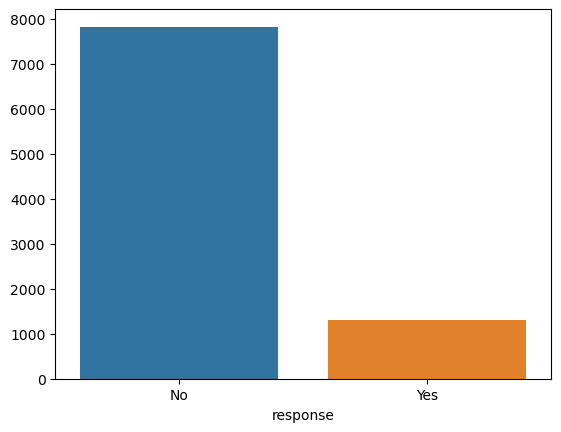

In [348]:
# Plot to show total number of responses
fig, ax = plt.subplots()
ax = sns.barplot(data=cleaned_df_mkt, x=cleaned_df_mkt['response'].value_counts().index, 
                      y=cleaned_df_mkt['response'].value_counts().values)
plt.show()

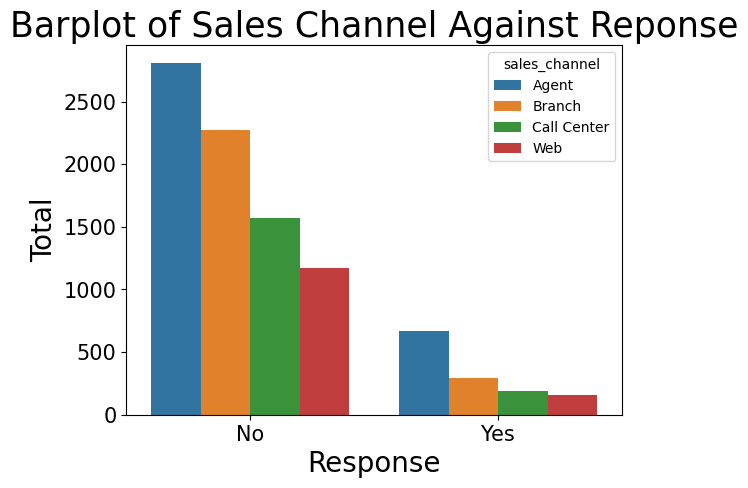

In [349]:
# Creating a grouped df for easier analysis with the use of hue 
# in seaborn to allow for splitting by sales channel, due to current df formatting
grouped_df_mkt = cleaned_df_mkt.groupby(['response','sales_channel'])['customer'].agg(
    'count').reset_index()
ax = sns.barplot(data=grouped_df_mkt, x=grouped_df_mkt['response'], 
                      y=grouped_df_mkt['customer'], hue='sales_channel' 
                )

ax.axes.set_title("Barplot of Sales Channel Against Reponse",fontsize=25)
ax.set_xlabel("Response",fontsize=20)
ax.set_ylabel("Total",fontsize=20)
ax.tick_params(labelsize=15)


plt.show()

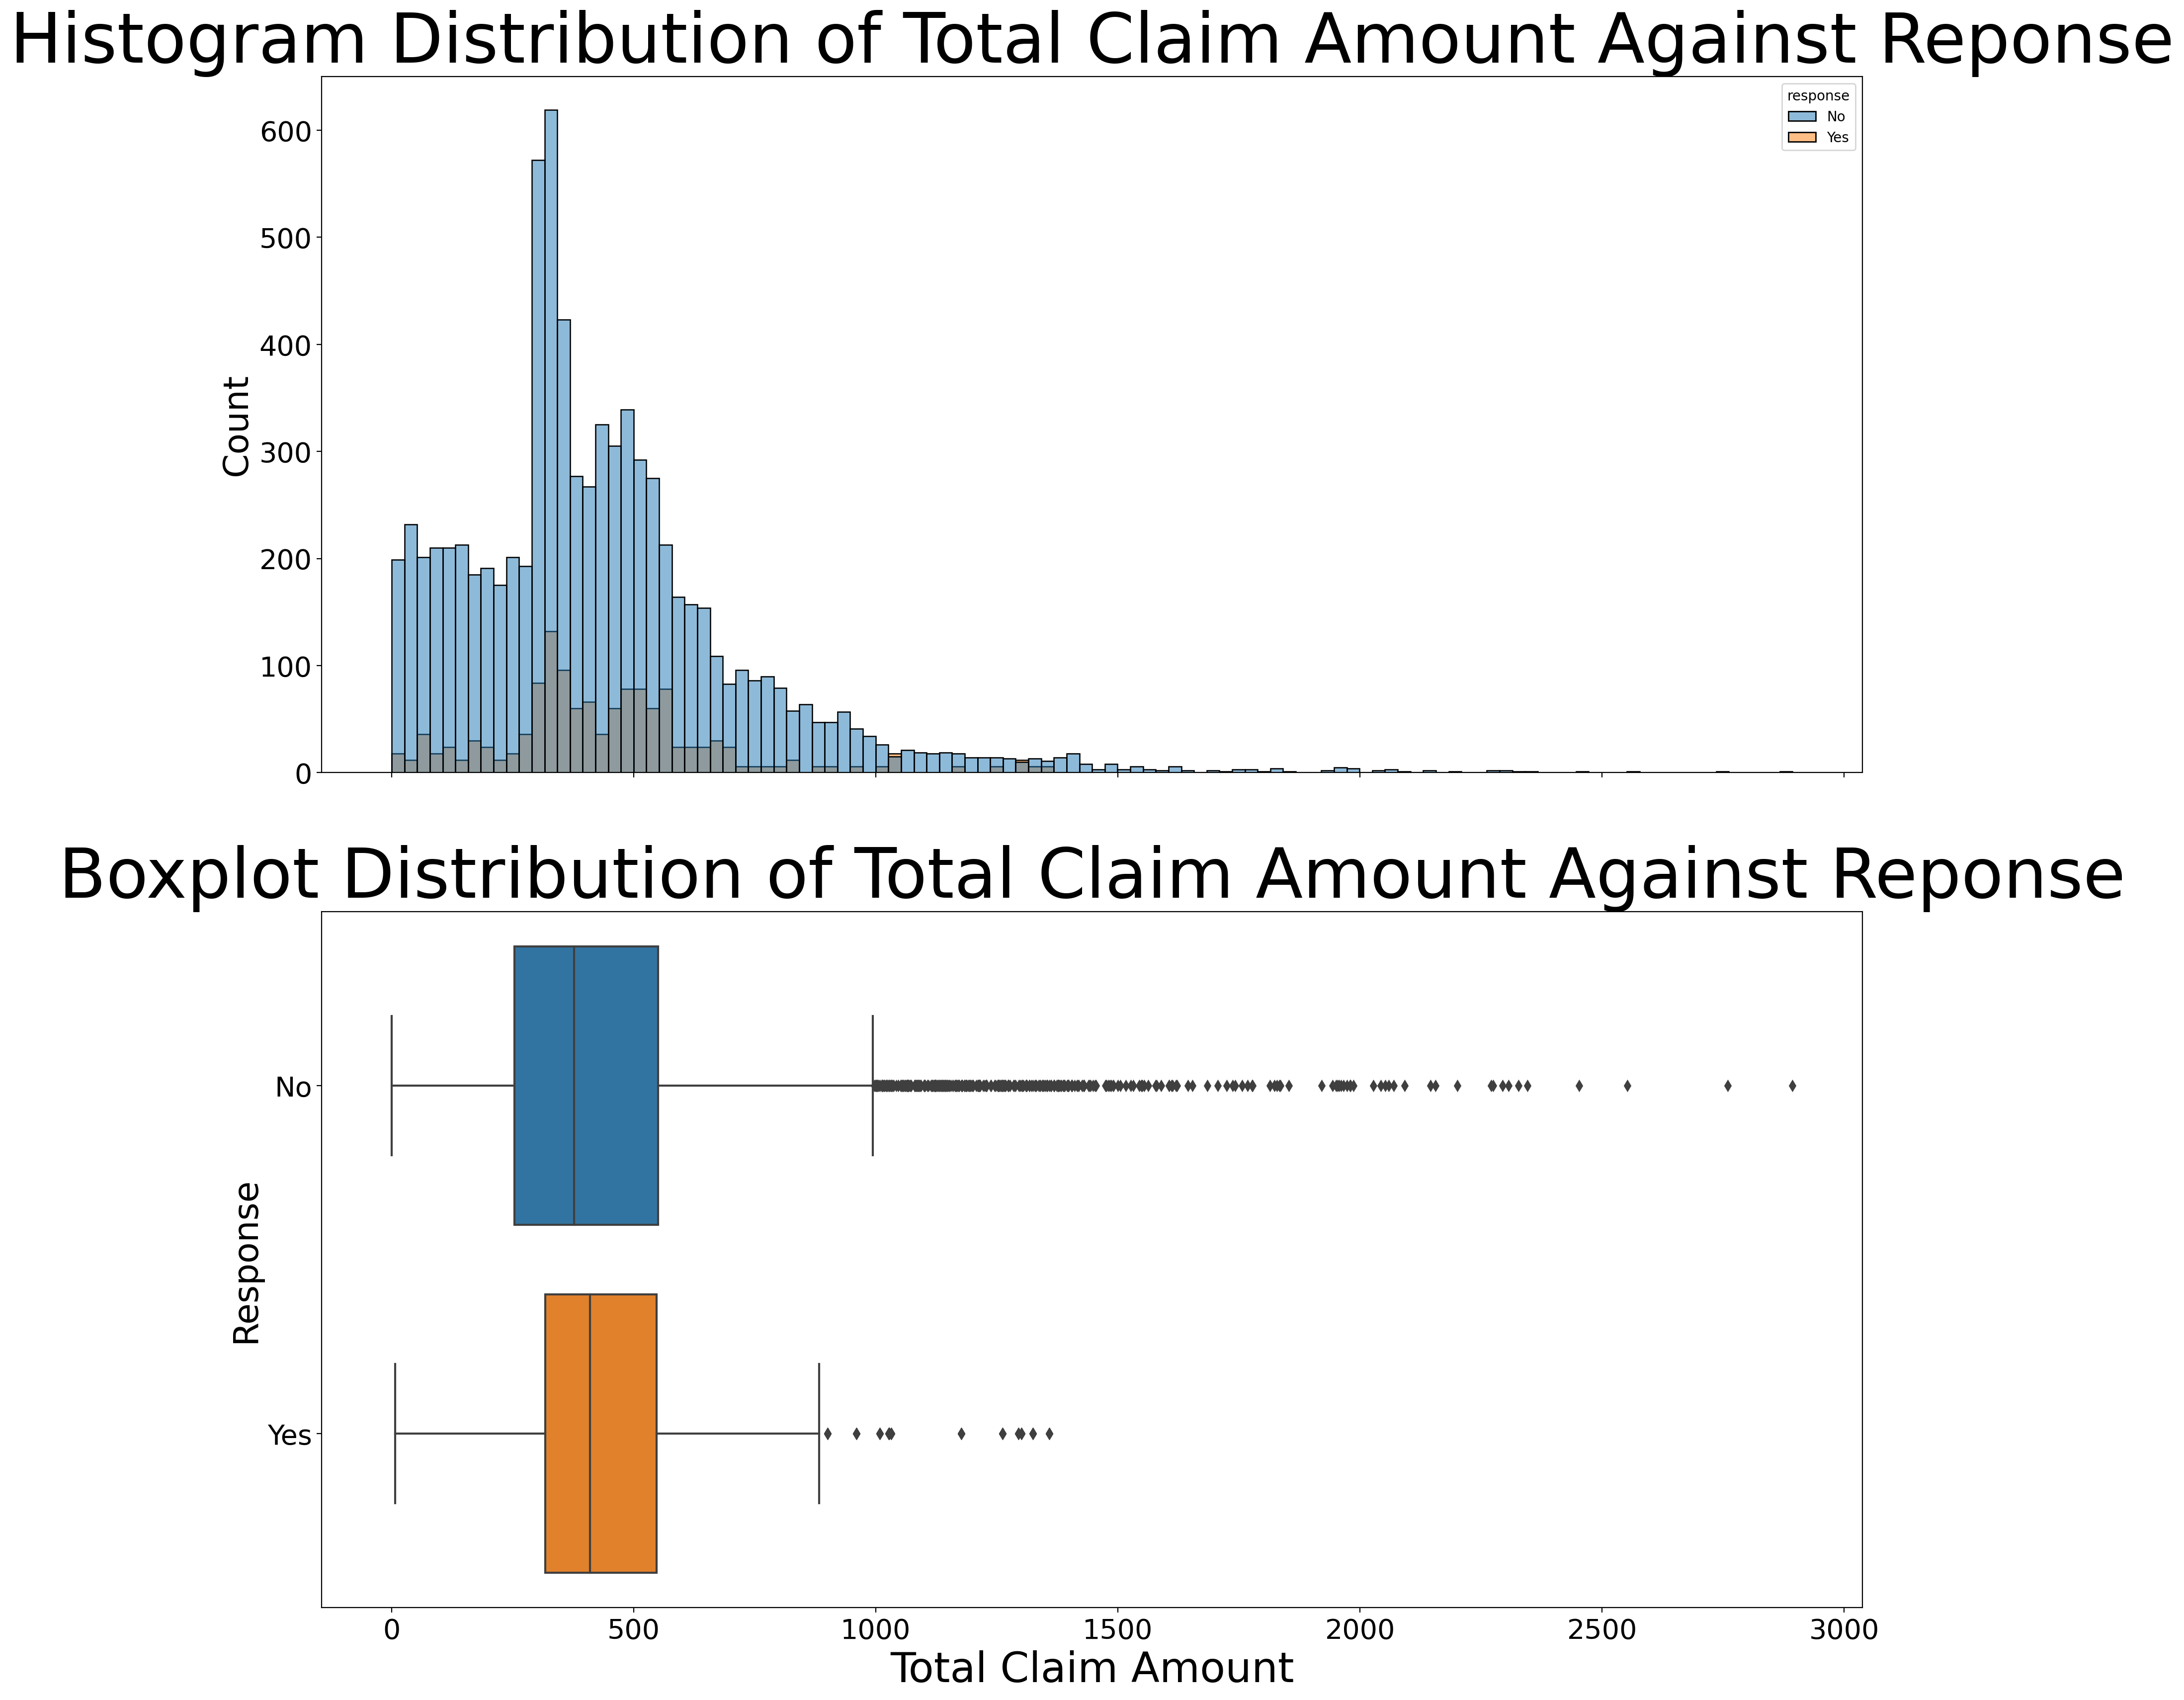

In [350]:
# Histogram and box plot to show distribution between total_claim_amount split by response


fig, ax = plt.subplots(2,1, figsize=(20,20), sharex=True, dpi=200)

a = sns.histplot(data=cleaned_df_mkt, x='total_claim_amount', hue='response', ax=ax[0])

b = sns.boxplot(data=cleaned_df_mkt, x='total_claim_amount', y='response', ax=ax[1])

a.axes.set_title("Histogram Distribution of Total Claim Amount Against Reponse",
                 fontsize=50)
a.set_ylabel("Count",fontsize=25)
a.tick_params(labelsize=20)

b.axes.set_title("Boxplot Distribution of Total Claim Amount Against Reponse",fontsize=50)
b.set_xlabel("Total Claim Amount",fontsize=30)
b.set_ylabel("Response",fontsize=25)
b.tick_params(labelsize=20)
plt.show()

<Axes: xlabel='income', ylabel='Count'>

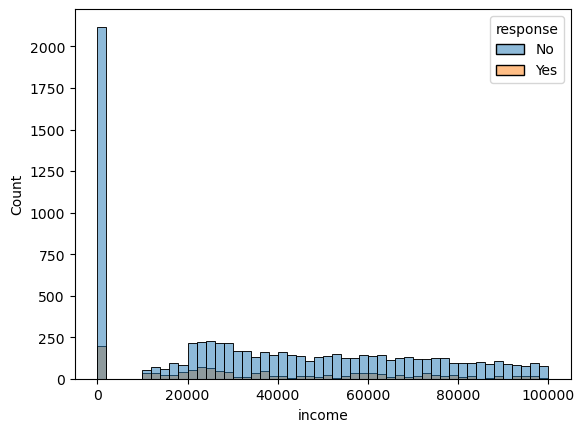

In [351]:
# Histogram plot to show distribution between income split by response
# High number of 0 income customers (~2k rows). Assuming incorrect data.
# Creating a new df to create a new visual
sns.histplot(data=cleaned_df_mkt, x='income', hue='response', bins=50)
#sns.boxplot(data=cleaned_df_mkt, x='income', y='response')

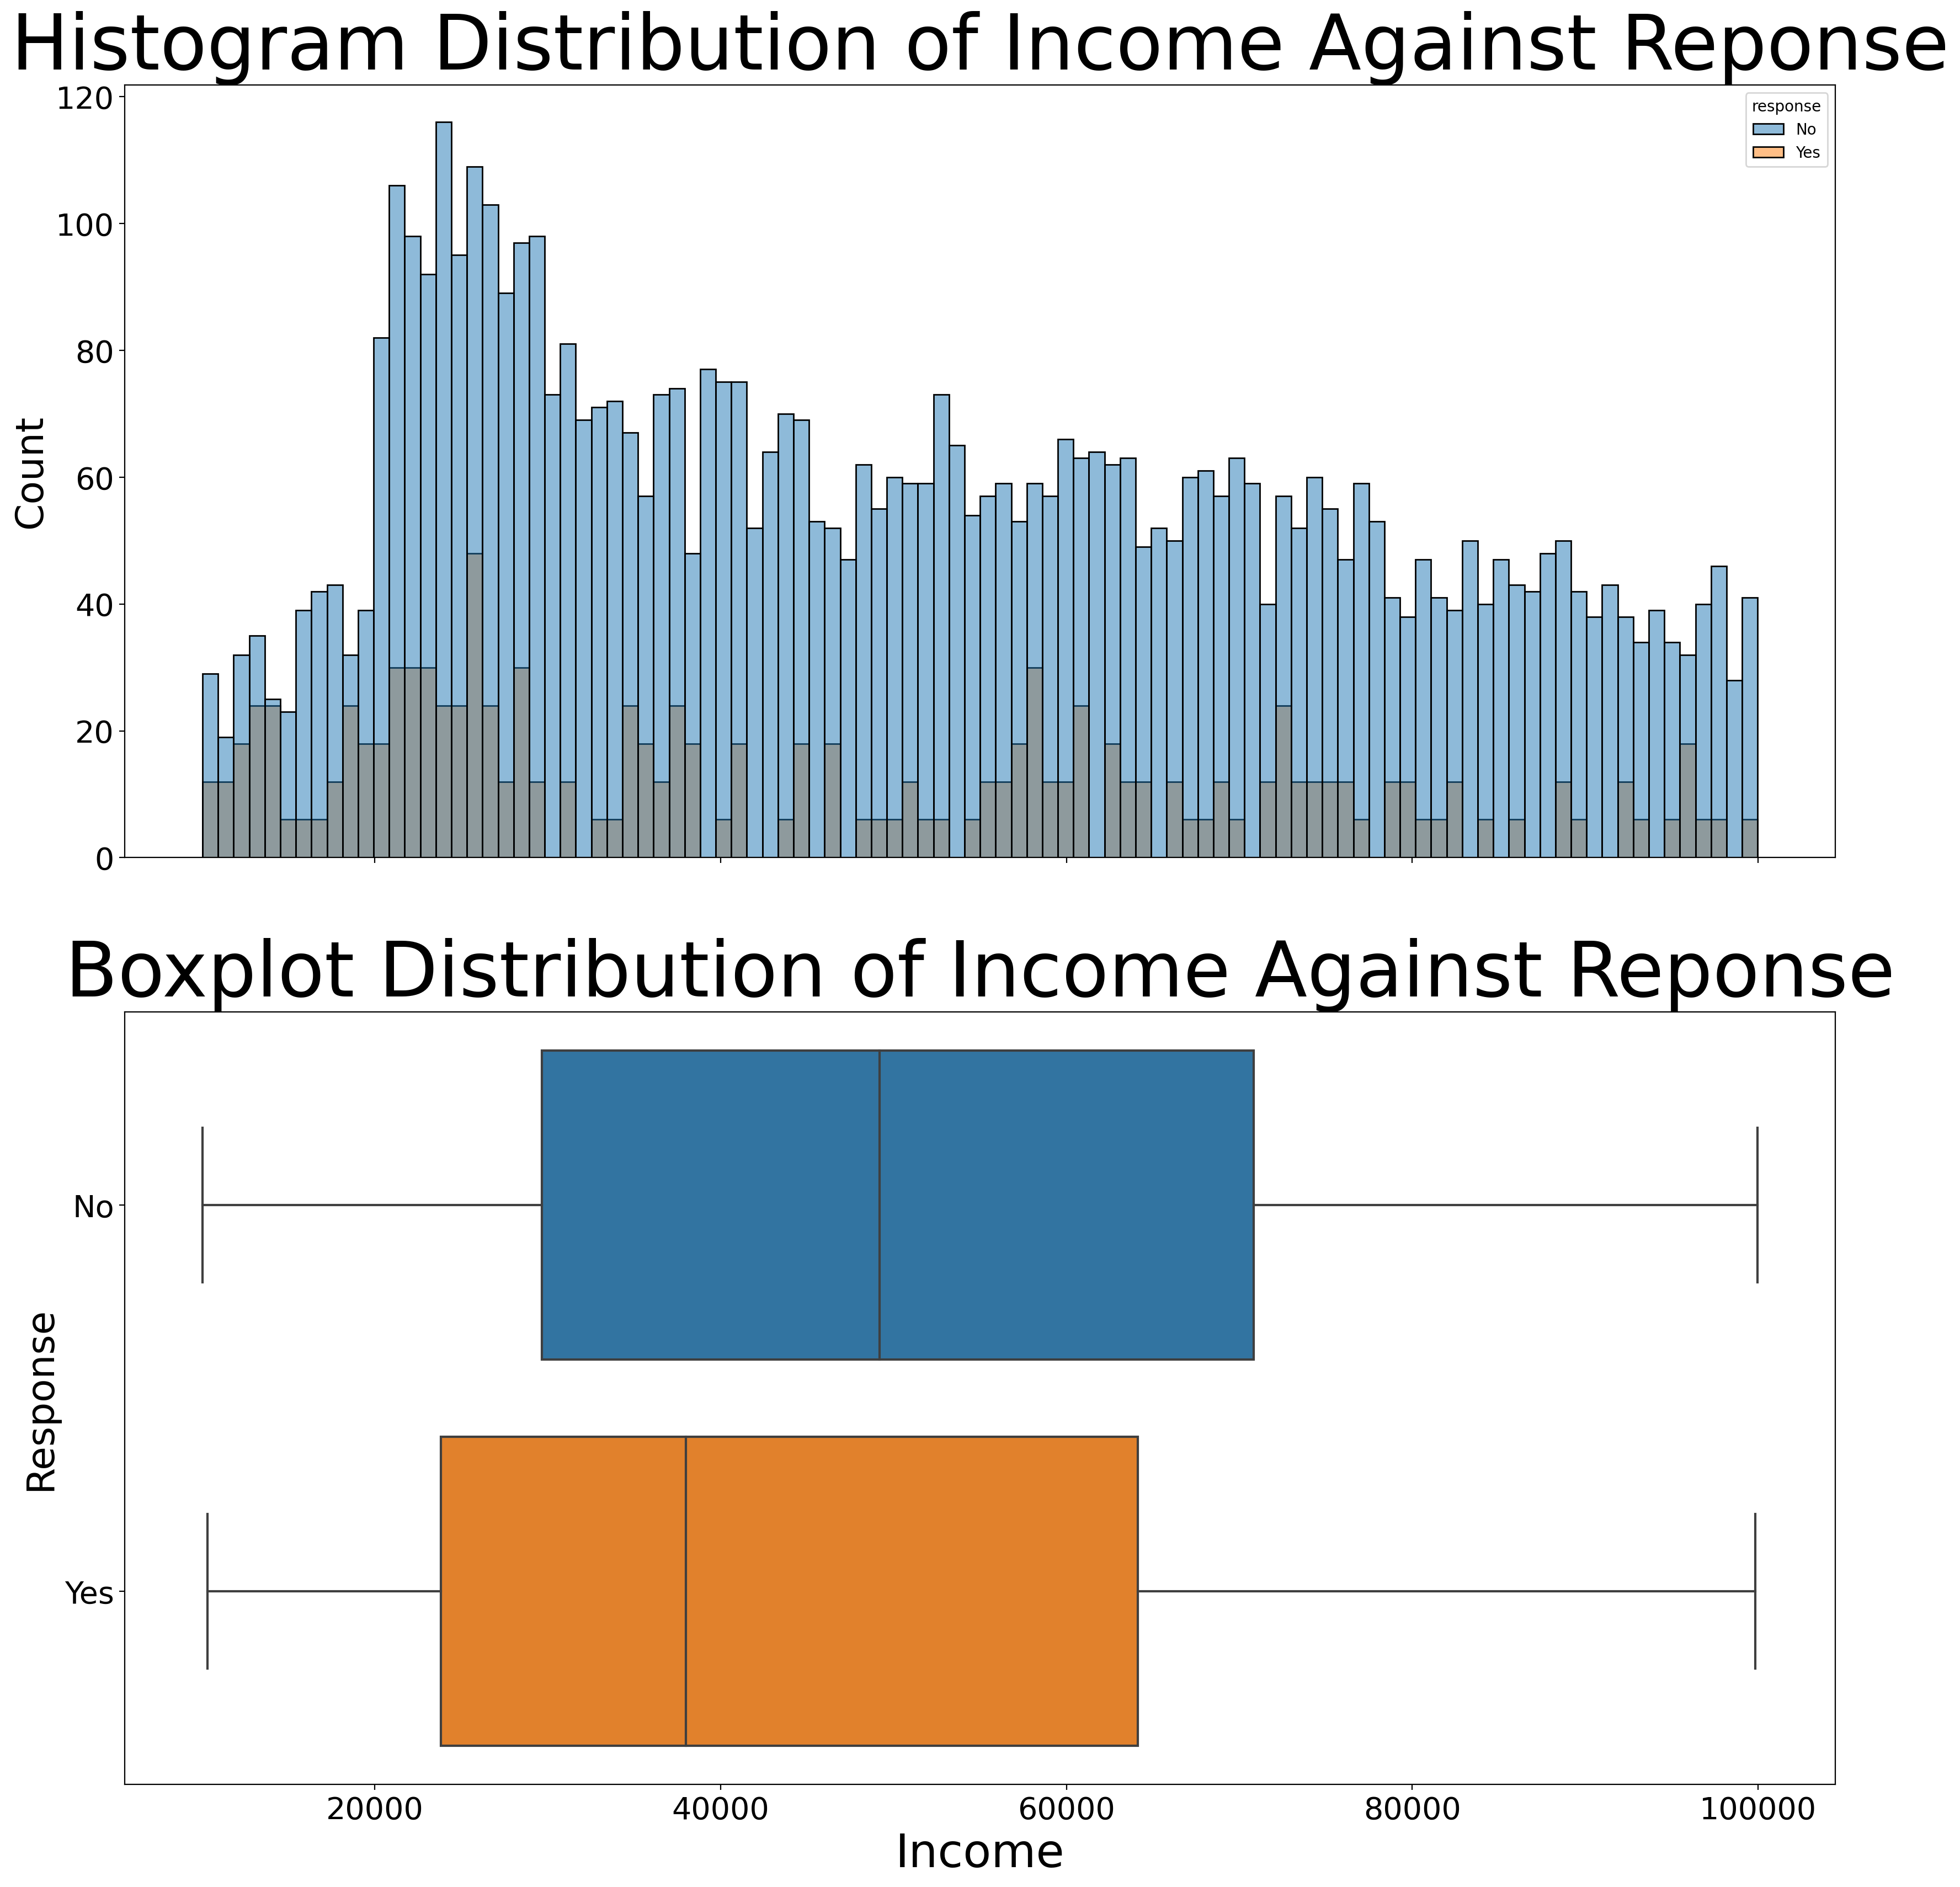

In [352]:
filtered_income_df_mkt = cleaned_df_mkt.loc[cleaned_df_mkt['income'] > 0]

fig, ax = plt.subplots(2,1, figsize=(20,20), sharex=True, dpi=200)

a = sns.histplot(data=filtered_income_df_mkt, x='income', hue='response', 
             bins=100, ax=ax[0])
b = sns.boxplot(data=filtered_income_df_mkt, x='income', y='response', ax=ax[1])

a.axes.set_title("Histogram Distribution of Income Against Reponse",
                 fontsize=50)
a.set_xlabel("Income",fontsize=30)
a.set_ylabel("Count",fontsize=25)
a.tick_params(labelsize=20)

b.axes.set_title("Boxplot Distribution of Income Against Reponse",
                 fontsize=50)
b.set_xlabel("Income",fontsize=30)
b.set_ylabel("Response",fontsize=25)
b.tick_params(labelsize=20)
plt.show()

In [353]:
# Checking income statistics after removing ~2k rows of 0 income.
# Quantile statistics significantly higher after filtering.
display(cleaned_df_mkt.describe())
display(filtered_income_df_mkt.describe())

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,2011-01-29 20:06:21.519596800,37657.380009,93.219291,14.717210,48.064594,0.374097,2.966170,434.088794
min,1898.007675,2011-01-01 00:00:00,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,2011-01-15 00:00:00,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,2011-01-29 00:00:00,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,2011-02-13 00:00:00,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,2011-02-28 00:00:00,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678
std,6870.967608,NaN,30379.904734,34.407967,10.134746,27.905991,0.899695,2.390182,290.500092


,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,6817.000000,6817,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000
mean,8130.229340,2011-01-29 18:57:30.550095360,50456.580461,92.963034,14.649699,47.832624,0.371718,2.951005,377.840789
min,2119.894333,2011-01-01 00:00:00,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4090.750678,2011-01-15 00:00:00,28432.000000,68.000000,6.000000,24.000000,0.000000,1.000000,210.100003
50%,5810.630529,2011-01-30 00:00:00,48081.000000,83.000000,13.000000,48.000000,0.000000,2.000000,340.800000
75%,9075.768214,2011-02-13 00:00:00,70187.000000,109.000000,23.000000,71.000000,0.000000,4.000000,498.612632
max,83325.381190,2011-02-28 00:00:00,99981.000000,297.000000,35.000000,99.000000,5.000000,9.000000,2893.239678
std,6949.067972,NaN,24305.956566,34.615160,10.121935,27.895350,0.894203,2.390613,252.648952


---
# Transformation exercises

### Complete the following task
- Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
    - Use seaborn library to construct distribution plots for the numerical variables
    - Use Matplotlib to construct histograms
    - Do the distributions for different numerical columns look symmetrical? Compute the skewness for each, and add a comment with your findings.
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
- If you find a pair of columns that show a high correlation between them (greater than 0.9), drop the one that is less correlated with the column total_claim_amount. Write code for both the correlation matrix. If there is no pair of features that have a high correlation, then do not drop any features.
- Plot the heatmap of the correlation matrix after the filtering.


In [354]:
# This code isn't necessarily required, but this jupyter notebook is very long at this point, so keeping a reference.
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import dataframe_cleaning_function_library as plib

In [355]:
# Recommend running all cells above this cell

cleaned_df_mkt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, 0 to 9687
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status        

In [356]:
# Creating numerical and categorical dataframes

numeric_df = cleaned_df_mkt.select_dtypes(np.number)
object_df = cleaned_df_mkt.select_dtypes(object)

In [357]:
# Checking df for null values 
object_df.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
vehicle_type        0
dtype: int64

In [358]:
# Quick df cleaning for numeric_df null values to allow for mutlicollinearity checking with VIF. 

numeric_df.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

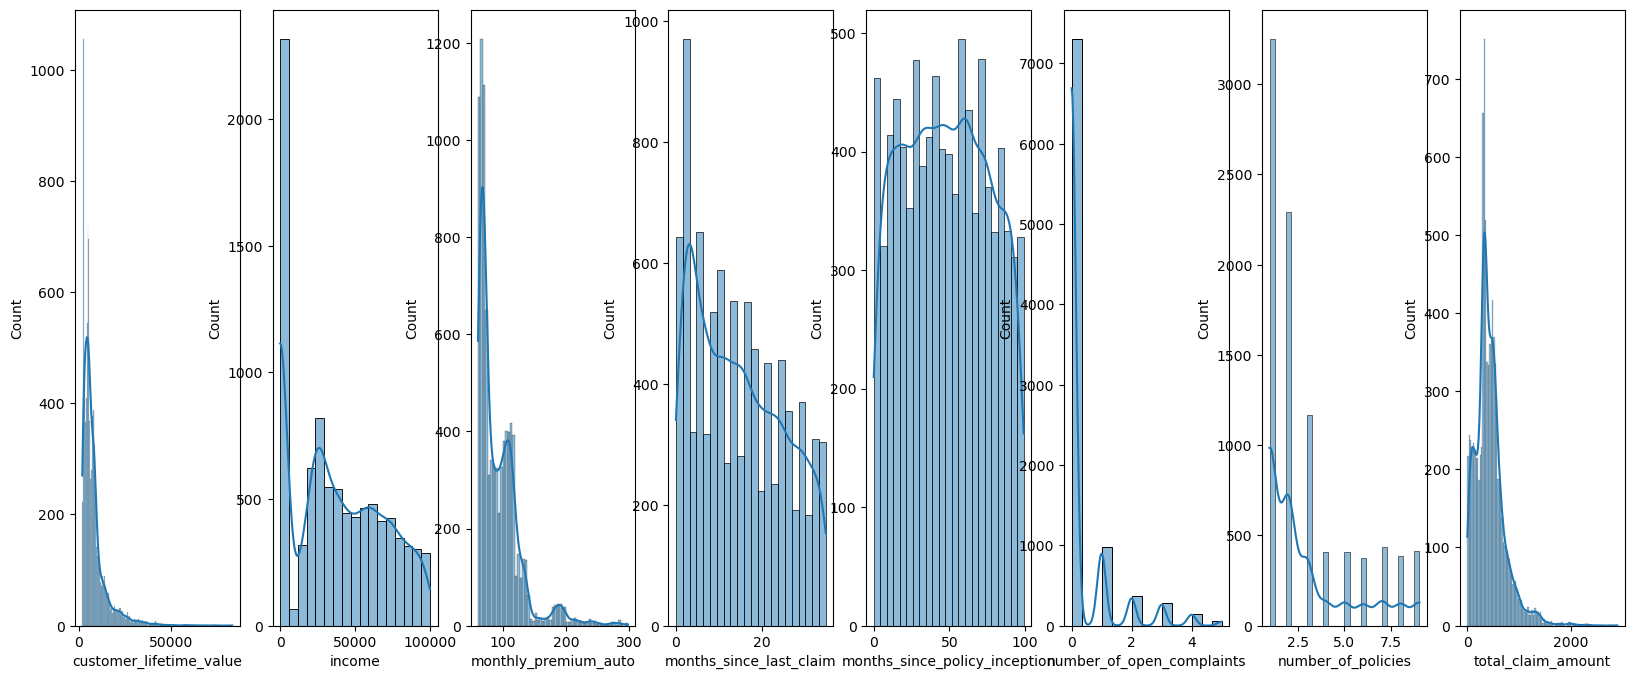

In [359]:
# Creating subplots with kde trend lines to better interpret the distribution of data. 
# To zoom in on the graphs, double click the figures.

plib.numerical_df_sns_histplot(numeric_df)

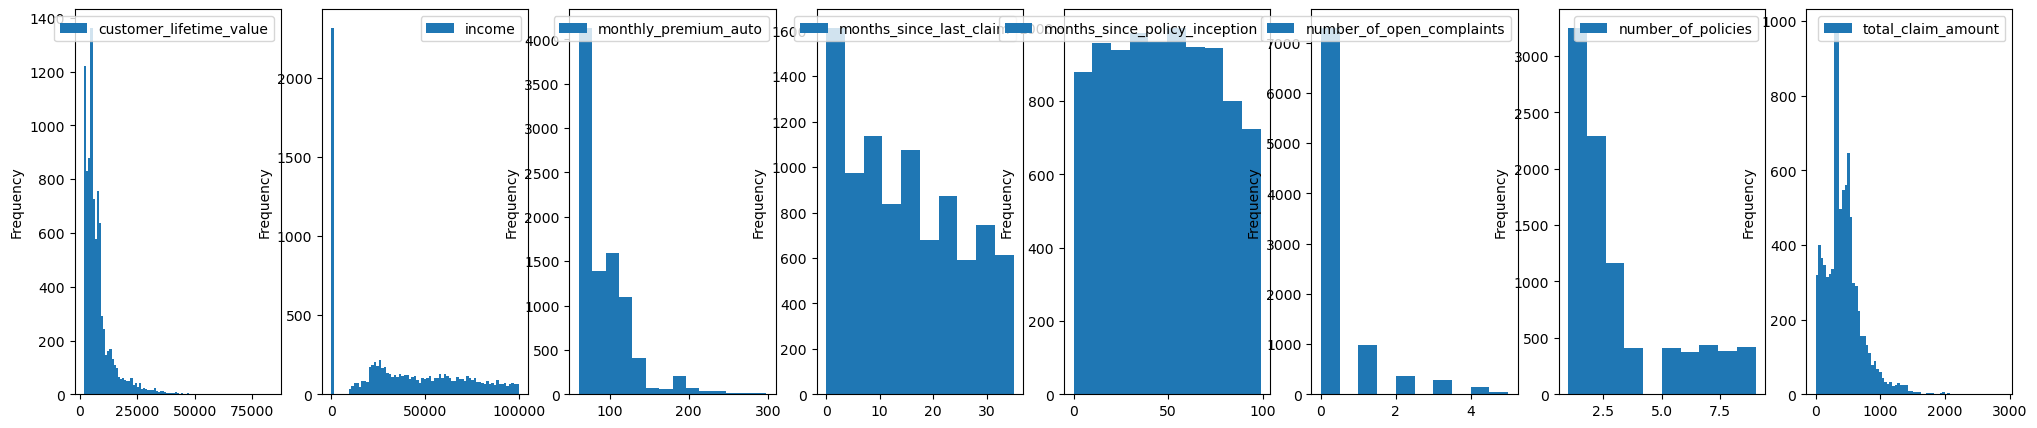

In [360]:
# Using math library and sqrt() method to determine the appropriate number of bins for the matplotlib distributions
# If sqrt as an int is below 10 (based on rest of values in value_counts() for df), using sqrt for n of bins.
# Otherwise using the default bins value from matplotlib.

import math
number_of_columns = len(numeric_df.columns)
fig, ax = plt.subplots(1,number_of_columns, figsize=(25,5))

for i in range(0,len(numeric_df.columns)):
    num_vals = len(numeric_df[numeric_df.columns[i]].value_counts().values)
    bins = int(math.sqrt(num_vals))
    if bins > 10:
        numeric_df.plot(kind='hist', y=numeric_df.columns[i], bins=bins, ax=ax[i])
    else:
        numeric_df.plot(kind='hist', y=numeric_df.columns[i], ax=ax[i])
plt.show()

In [361]:
# Computing skewness

numeric_skew = numeric_df.skew(axis=0)
display(numeric_skew)

customer_lifetime_value          3.032280
income                           0.286887
monthly_premium_auto             2.123546
months_since_last_claim          0.325026
months_since_policy_inception    0.040165
number_of_open_complaints        2.827790
number_of_policies               1.253333
total_claim_amount               1.714966
dtype: float64

### Distribution and skewness insights: 

- customer_lifetime_value, skewness of 3.03; requires transformation to normalise before modelling
- income, skewness of 0.286; requires transformation to normalise before modelling
- monthly_premium_auto, skewness of 2.12; requires transformation to normalise before modelling
- months_since_last_claim, skewness of 0.32.
- months_since_policy_inception, skewness of 0.040.
- number_of_open_complaints, skewness of 2.83; requires transformation to normalise before modelling-
- number_of_policies, skewness of 1.25.
- total_claim_amount, skewness of 1.71.



- All distributions seem to have a right skew (positive skew (mean > median)), aside from months since policy inception which looks a bit more uniform than the rest. 

- Skew of distribution does not look symmetrical for any of the distributions among the numerical columns, only ones with similarity are between total_claim_amount (also 'y' for model) and customer_lifetime_value, likely worth checking for multicollinearity. 
- Income also has a right/positive skew with multiple peaks, mainly due to the high number of 0 income customers. Discounting these 0 values, the skew is a bit more uniform but still showing a right skew.

- The lowest skew is in months since policy inception with 0.04, which also helps explain the more uniform distribution.


In [362]:
# Personal library function to detect multicollinearity between columns and drop applicable columns from df. 
# Similar to VIF but with customisable float threshold for detecting correlation.

filtered_df_corr = plib.multicollinearity_columns_search_and_drop(numeric_df, 'total_claim_amount', 0.9)
filtered_df_corr

No multicollinearity between X columns found with threshold of 0.9. No features dropped


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.012534,0.009418,-0.034701,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.025203,-0.000875,0.008211,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.007757,0.020257,-0.010573,-0.011233,0.632017
months_since_last_claim,0.012534,-0.025203,0.007757,1.000000,-0.041191,0.020922,0.008094,0.009562
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.041191,1.000000,-0.003274,-0.013333,0.003335
number_of_open_complaints,-0.034701,0.008211,-0.010573,0.020922,-0.003274,1.000000,0.000794,-0.013348
number_of_policies,0.021955,-0.008656,-0.011233,0.008094,-0.013333,0.000794,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.009562,0.003335,-0.013348,-0.002354,1.000000


In [363]:
# Detecting for multicollinearity among columns after removing total_claim_amount

# Columns to consider
selected_columns = list(numeric_df.columns)
selected_columns.remove("total_claim_amount")

# compute vif
vif_df = plib.compute_vif(numeric_df, selected_columns)
display(vif_df)

,Variable,VIF
0,customer_lifetime_value,1.190137
1,monthly_premium_auto,1.188223
2,months_since_last_claim,1.003046
3,months_since_policy_inception,1.002301
4,income,1.002257
5,number_of_open_complaints,1.001776
6,number_of_policies,1.001277


In [364]:
# Using code from class notebook where VIF = 3 is the value to filter out for multicollinearity.
while any(vif_df["VIF"] > 3):
    selected_columns.remove(vif_df.iloc[0,0])
    display(vif_df)
    print(selected_columns)
    vif_df = compute_vif(reg_data, selected_columns)

display(vif_df)
print("The final selected columns are: ", selected_columns)


,Variable,VIF
0,customer_lifetime_value,1.190137
1,monthly_premium_auto,1.188223
2,months_since_last_claim,1.003046
3,months_since_policy_inception,1.002301
4,income,1.002257
5,number_of_open_complaints,1.001776
6,number_of_policies,1.001277


The final selected columns are:  ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']


In [365]:
# Creating correlation df from numeric_df

corr_df = numeric_df.corr()
corr_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.012534,0.009418,-0.034701,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.025203,-0.000875,0.008211,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.007757,0.020257,-0.010573,-0.011233,0.632017
months_since_last_claim,0.012534,-0.025203,0.007757,1.000000,-0.041191,0.020922,0.008094,0.009562
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.041191,1.000000,-0.003274,-0.013333,0.003335
number_of_open_complaints,-0.034701,0.008211,-0.010573,0.020922,-0.003274,1.000000,0.000794,-0.013348
number_of_policies,0.021955,-0.008656,-0.011233,0.008094,-0.013333,0.000794,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.009562,0.003335,-0.013348,-0.002354,1.000000


- If you find a pair of columns that show a high correlation between them (greater than 0.9), drop the one that is less correlated with the column total_claim_amount. Write code for both the correlation matrix. If there is no pair of features that have a high correlation, then do not drop any features.

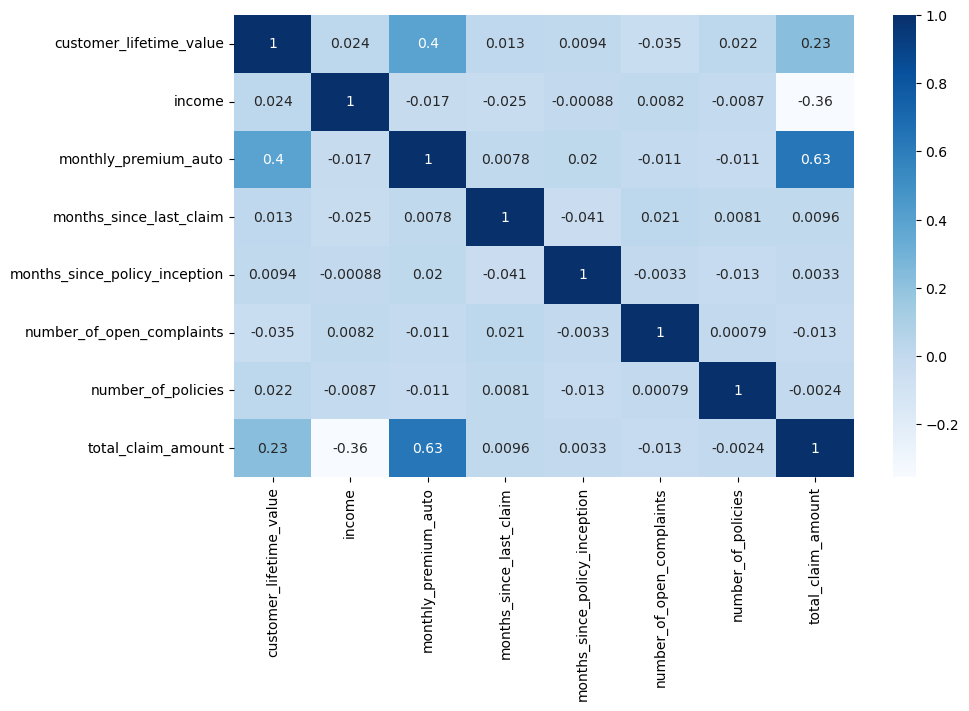

In [366]:
# Initial heatmap creation with all columns

plt.figure(figsize=(10,6))
sns.heatmap(corr_df, cmap='Blues',annot=True)
plt.show()

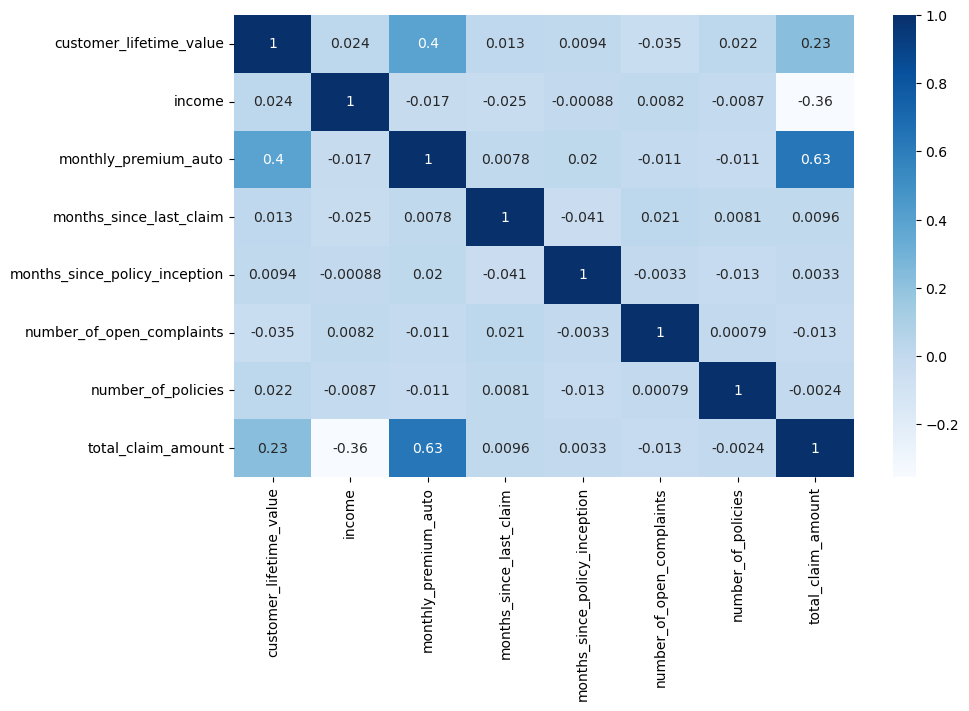

In [367]:
# Initial heatmap creation with personal library multicollinearity filtering (same result in this case)

plt.figure(figsize=(10,6))
sns.heatmap(filtered_df_corr, cmap='Blues',annot=True)
plt.show()

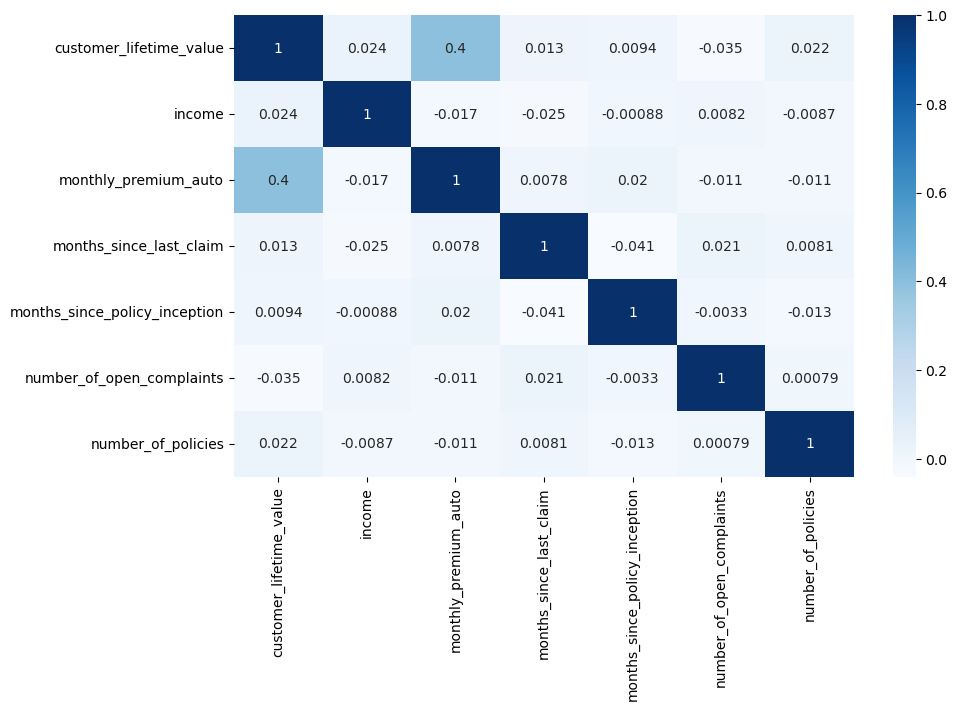

In [368]:
# Plotting a heatmap without the total_claim amount column
numeric_df_no_claim_amount = numeric_df.drop(columns='total_claim_amount')
numeric_corr_no_claim = numeric_df_no_claim_amount.corr()

plt.figure(figsize=(10,6))
sns.heatmap(numeric_corr_no_claim, cmap='Blues',annot=True)
plt.show()


<Axes: >

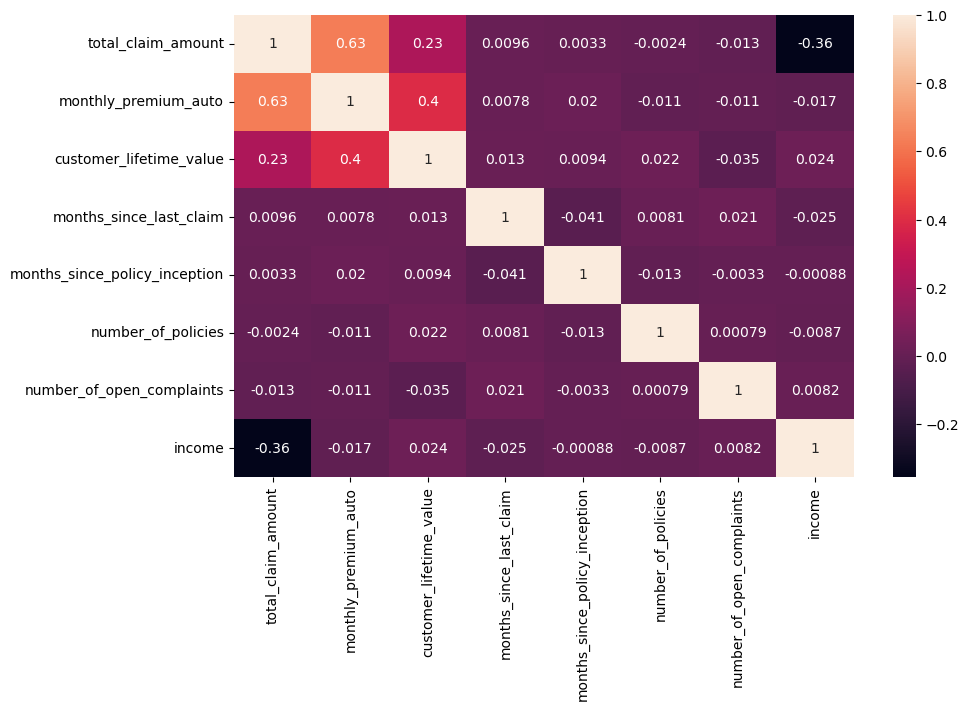

In [369]:
# Creating a total_claim_amount correlation matrix, based on jupyter notebook from:
"""
https://nbviewer.org/github/PBPatil/Exploratory_Data_Analysis-Wine_Quality_Dataset/blob/master/winequality_white.ipynb
"""
# Putting total claim amount as first column in heatmap. 

k = len(numeric_df.columns) # also number of variables for heatmap in this instance. 
cols = numeric_df.corr().nlargest(k, 'total_claim_amount')['total_claim_amount'].index
cm = numeric_df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)

# Model Generation and Validation Exercises

Performing the following order of steps:
1. Selecting X and y (no df creation)
2. Removing outliers for X
3. Transforming necessary X columns
4. Splitting train and test data
5. Splitting X into numerical and object dfs; 
6. Scaling (all) numerical X columns
7. Encoding categorical columns, defining distance for nominal
8. Concatenating transformed numerical and categorical test and train X dataframes
9. Scaling concatenated dataframe
10. Training LM model
11. Evaluating model performance against test
12. Summarising error metrics

__ 
the best variables are those that have a high correlation with the target (you want to predict, always the y), 
but low correlation between themselves.
Based on this methodology, only monthly_premium_auto qualifies as a variable to use for this model, since no other
columns have a somewhat strong correlation with total_claim_amount (y)
__

In [370]:
def outlier_function_graphs(df: pd.DataFrame, y: pd.Series, x_cols: list):
    """
    Function: 
    Inputs: 
    Outputs:
    """
    df2 = df.copy()
    df2_num = df2.select_dtypes(np.number)
    for i in range(0, len(x_cols)):
        
        fig, ax = plt.subplots(3, 2, figsize=(8, 20))
        sns.boxplot(x=df2[x_cols[i]], ax=ax[0,0])
        sns.boxplot(x=y, ax=ax[0,1])
        sns.scatterplot(x=df2[x_cols[i]], y=y, ax=ax[1,0])
        sns.scatterplot(x=y, y=df2[x_cols[i]], ax=ax[1,1])
        sns.histplot(data=df2[x_cols[i]], kde=True, ax=ax[2,0])
        sns.histplot(data=y, kde=True, ax=ax[2,1])
        plt.show()

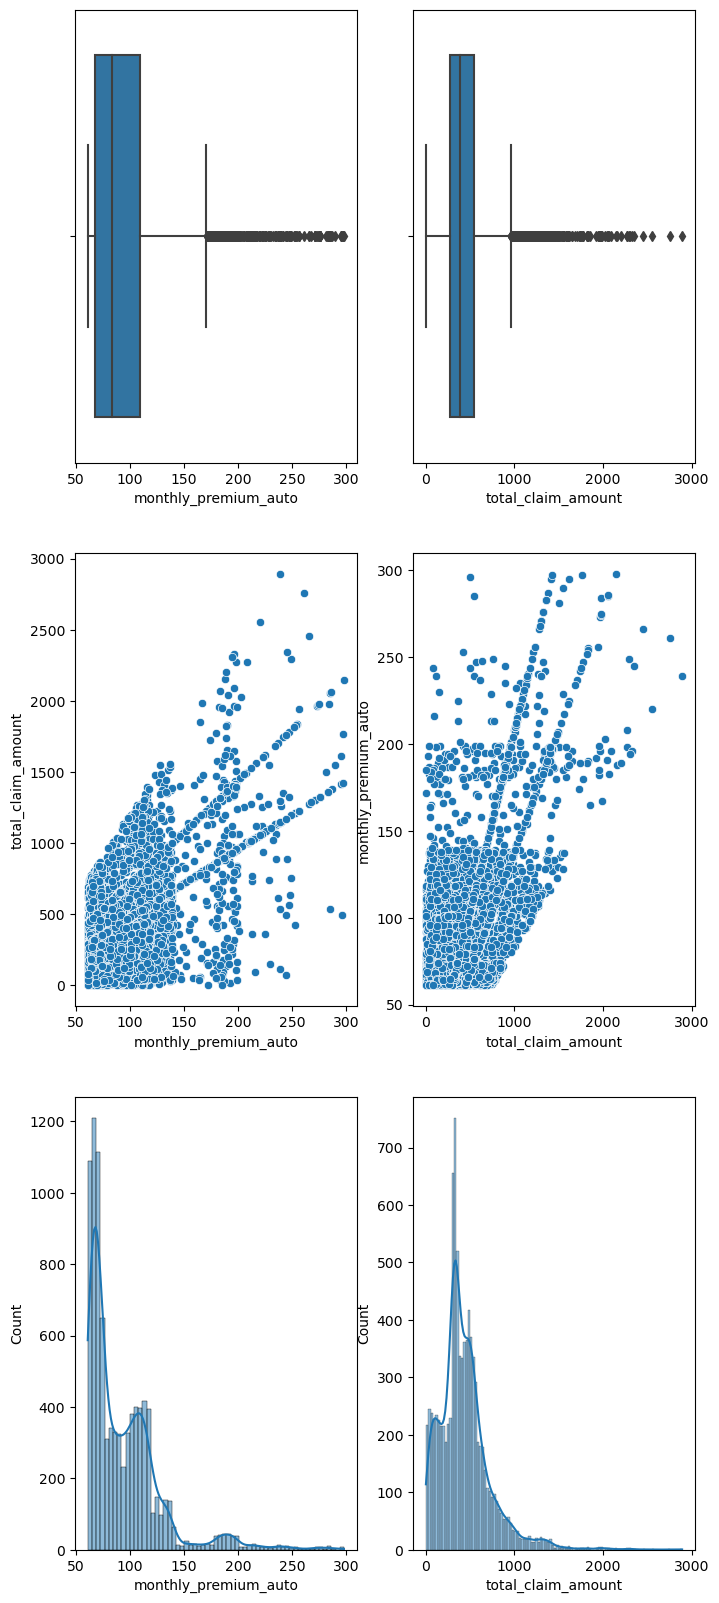

In [371]:
outlier_function_graphs(cleaned_df_mkt, cleaned_df_mkt['total_claim_amount'], ['monthly_premium_auto'])

In [372]:
def outlier_removal(df: pd.DataFrame, cols:list, iqr_factor: float=1.5):
    """
    Function:
    Inputs: 
    Output
    """
    df2 = df.copy()
    for i in range(0, len(cols)):
        iqr = np.quantile(df2[cols[i]], 0.75) - np.quantile(df2[cols[i]], 0.25)
        upper_whisker = np.quantile(df2[cols[i]], 0.75) + iqr_factor*iqr
        lower_whisker = np.quantile(df2[cols[i]], 0.25) - iqr_factor*iqr
        df2_filtered = df2[(df2[cols[i]] < upper_whisker) & (df2[cols[i]] > lower_whisker)]
    return df2_filtered

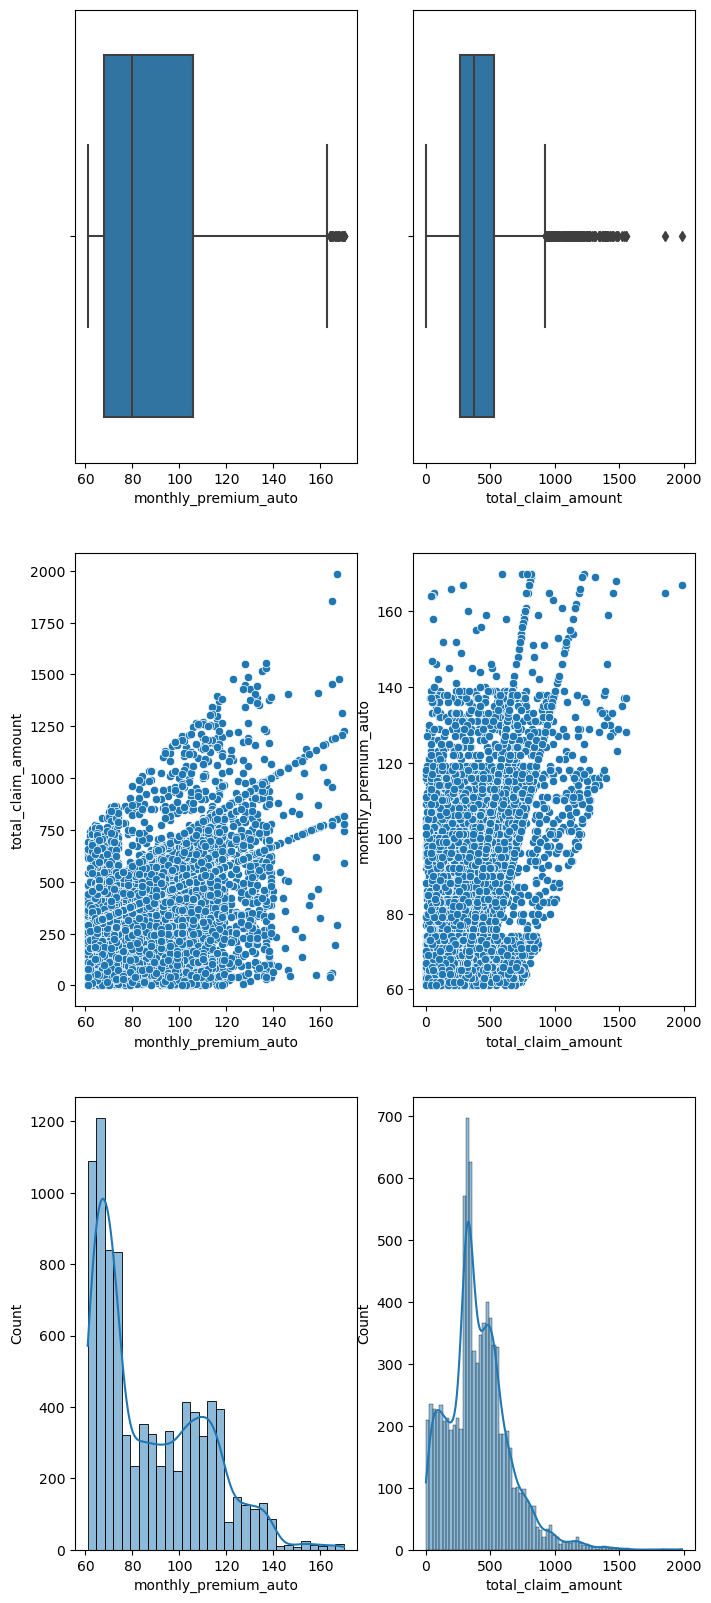

In [373]:
x_outlier_cleaned_df_mkt = outlier_removal(cleaned_df_mkt, ['monthly_premium_auto'])

outlier_function_graphs(x_outlier_cleaned_df_mkt, x_outlier_cleaned_df_mkt['total_claim_amount'], 
                        ['monthly_premium_auto'])

/Users/HenrySoysa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


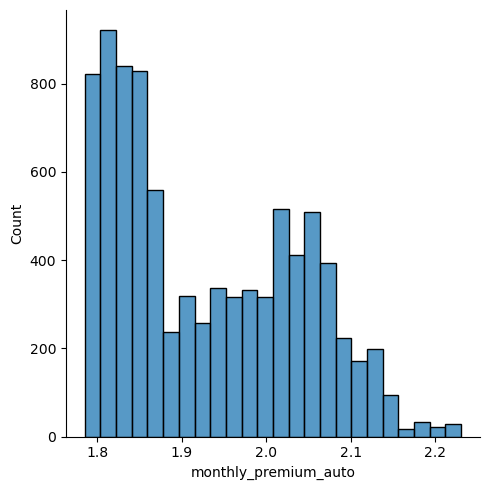

In [374]:
# Transforming numerical X column, and keeping same X name
def log_transfom_clean2(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # We are returning NaNs so that we can replace them with means later
    
    
x_outlier_cleaned_df_mkt['monthly_premium_auto'] = list(map(log_transfom_clean2, x_outlier_cleaned_df_mkt['monthly_premium_auto']))
# Now we replace the NAN by the mean
x_outlier_cleaned_df_mkt['monthly_premium_auto'] = x_outlier_cleaned_df_mkt[
    'monthly_premium_auto'].fillna(np.mean(x_outlier_cleaned_df_mkt['monthly_premium_auto']))
sns.displot(x_outlier_cleaned_df_mkt['monthly_premium_auto'])
plt.show()


In [375]:
# For X, y df split, dropping all numerical columns aside from monthly_premium_auto, income and CLV. 
# This leads to slightly lower error metrics compared to keeping all numerical columns - screenshot in repo shows difference.
X = x_outlier_cleaned_df_mkt.drop(columns=['total_claim_amount', 'number_of_policies','number_of_open_complaints', 
                                           'months_since_policy_inception', 'months_since_last_claim'])
y = x_outlier_cleaned_df_mkt[['total_claim_amount']]

In [376]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

In [377]:
# Creating dataframes with X_train and X_test data.
X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_test_df = pd.DataFrame(X_test, columns = X.columns)

In [378]:
X_train_df_num = X_train_df.select_dtypes(np.number)
X_train_df_categ = X_train_df.select_dtypes(object)
X_train_df_num

,customer_lifetime_value,income,monthly_premium_auto
1391,33718.842400,27500,2.056905
3647,8193.750001,12780,2.045323
775,4502.207001,46402,2.053078
4142,6282.082435,32311,1.897627
6873,6220.765007,0,1.812913
...,...,...,...
7105,2756.543334,42336,1.838849
9485,4835.783179,36655,1.785330
5124,7610.840476,98701,1.973128
9359,2758.498582,65794,1.838849


In [379]:
X_test_df_num = X_test_df.select_dtypes(np.number)
X_test_df_categ = X_test_df.select_dtypes(object)

In [380]:
display(X_train_df_num.describe())
display(X_test_df_num.describe())

,customer_lifetime_value,income,monthly_premium_auto
count,6528.000000,6528.000000,6528.000000
mean,7565.718484,37856.972426,1.926976
std,6256.470761,30506.083803,0.108011
min,1898.683686,0.000000,1.785330
25%,3832.703407,0.000000,1.832509
50%,5567.390861,33881.500000,1.897627
75%,8649.306412,62473.250000,2.025306
max,57520.501510,99961.000000,2.230449


,customer_lifetime_value,income,monthly_premium_auto
count,2176.000000,2176.000000,2176.000000
mean,7612.759528,37107.906250,1.933478
std,5996.252731,30336.960535,0.108189
min,1898.007675,0.000000,1.785330
25%,3994.989395,0.000000,1.832509
50%,5679.163266,33571.000000,1.921679
75%,8706.034240,61664.000000,2.025306
max,46302.075620,99981.000000,2.222716


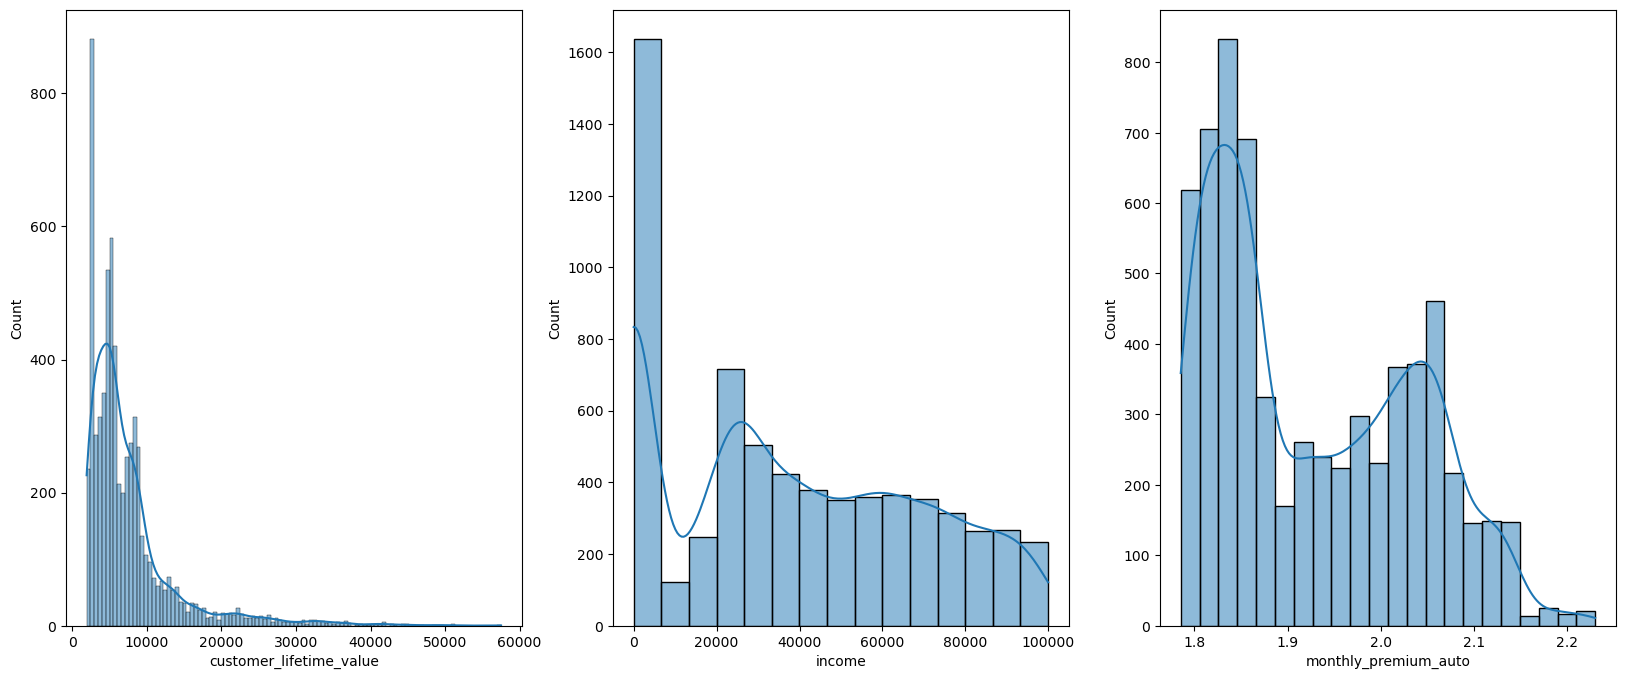

In [381]:
plib.numerical_df_sns_histplot(X_train_df_num)
# Logarithmic transformation a viable option for monthly_premium_auto.

In [382]:
import pickle
from sklearn.preprocessing import MinMaxScaler # Sets for each colum the minimum = 0 and the maximum = 1

scaler = MinMaxScaler()

scaler.fit(X_train_df_num) # fit() Determine the min and the max of each column in the TRAIN set

path = "scalers"
scaler_file_name = "min_max_scaler.pkl"

with open(path + scaler_file_name, "wb") as file:
    pickle.dump(scaler, file)

X_train_minmax_scaled = scaler.transform(X_train_df_num) # .transform() applies the transformation x_normalized will be np.array
X_test_minmax_scaled  = scaler.transform(X_test_df_num) # .transform() applies the transformation x_normalized will be np.array

# We create new Pandas DataFrames out of the Numpy arrays.

X_train_minmax_scaled_df = pd.DataFrame(X_train_minmax_scaled, columns=X_test_df_num.columns)
X_test_minmax_scaled_df  = pd.DataFrame(X_test_minmax_scaled,  columns=X_test_df_num.columns)

X_train_minmax_scaled_df.head()

,customer_lifetime_value,income,monthly_premium_auto
0,0.572081,0.275107,0.610118
1,0.113176,0.127850,0.584098
2,0.046808,0.464201,0.601521
3,0.078807,0.323236,0.252286
4,0.077705,0.000000,0.061969


In [383]:
import os

path = "scalers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "min_max_scaler.pkl" # Use a descriptive name for your scaler/transformer but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
    pickle.dump(filename, file) # Replace "variable" with the name of the variable that contains your transformer

---
### Splitting categorial df into nominal and ordinal df. 

In [384]:
"""X_train_df_categ_nom = X_train_df_categ[['state', 'response', 'employmentstatus', 'gender', 'marital_status', 
                  'policy_type', 'renew_offer_type', 'sales_channel', 'vehicle_type']]
X_test_df_categ_nom = X_test_df_categ[['state', 'response', 'employmentstatus', 'gender', 'marital_status', 
                  'policy_type', 'renew_offer_type', 'sales_channel', 'vehicle_type']]"""

# nom_cat columns requiring transformation: 
nom_cat_columns = ['state', 'response', 'employmentstatus', 'gender', 'marital_status', 
                  'policy_type', 'renew_offer_type', 'sales_channel', 'vehicle_type']

In [385]:
#X_train_df_categ_ord = X_train_df_categ[['coverage', 'education', 'location_code', 'policy', 'vehicle_class', 'vehicle_size']]
#X_test_df_categ_ord = X_test_df_categ[['coverage', 'education', 'location_code', 'policy', 'vehicle_class', 'vehicle_size']]
for col in nom_cat_columns:
    print(X_train_df_categ[col].value_counts())

state
California    2245
Oregon        1852
Arizona       1227
Nevada         642
Washington     562
Name: count, dtype: int64
response
No     5598
Yes     930
Name: count, dtype: int64
employmentstatus
Employed         4067
Unemployed       1637
Medical Leave     327
Disabled          296
Retired           201
Name: count, dtype: int64
gender
F    3372
M    3156
Name: count, dtype: int64
marital_status
Married     3786
Single      1746
Divorced     996
Name: count, dtype: int64
policy_type
Personal Auto     4874
Corporate Auto    1382
Special Auto       272
Name: count, dtype: int64
renew_offer_type
Offer1    2658
Offer2    2105
Offer3    1020
Offer4     745
Name: count, dtype: int64
sales_channel
Agent          2529
Branch         1821
Call Center    1262
Web             916
Name: count, dtype: int64
vehicle_type
A    3274
M    3254
Name: count, dtype: int64


In [386]:
coverage_values = {'Basic': 1, 'Extended': 2, 'Premium': 3}
education_values = {'High School or Below':1, 'College':2, 'Bachelor':3, 'Master':4, 'Doctor':5 }
location_code_values = {'Urban':1, 'Suburban':2, 'Rural':3}
policy_values = {'Personal L1':1, 'Personal L2':2, 'Personal L3':3, 'Corporate L1':4, 'Corporate L2':5, 
                 'Corporate L3':6, 'Special L1':7, 'Special L2':8, 'Speical L3':9}
vehicle_class_values = {'Two-Door Car':1, 'Four-Door Car':2, 'SUV':3, 'Luxury':4}
vehicle_size_values = {'Small':1, 'Medsize':2, 'Large':3}


In [387]:
X_train_df_categ['coverage'] = X_train_df_categ['coverage'].replace(coverage_values)
X_train_df_categ['education'] = X_train_df_categ['education'].replace(education_values)
X_train_df_categ['location_code'] = X_train_df_categ['location_code'].replace(location_code_values)
X_train_df_categ['policy'] = X_train_df_categ['policy'].replace(policy_values)
X_train_df_categ['vehicle_class'] = X_train_df_categ['vehicle_class'].replace(vehicle_class_values)
X_train_df_categ['vehicle_size'] = X_train_df_categ['vehicle_size'].replace(vehicle_size_values)
display(X_train_df_categ.head())


X_test_df_categ['coverage'] = X_test_df_categ['coverage'].replace(coverage_values)
X_test_df_categ['education'] = X_test_df_categ['education'].replace(education_values)
X_test_df_categ['location_code'] = X_test_df_categ['location_code'].replace(location_code_values)
X_test_df_categ['policy'] = X_test_df_categ['policy'].replace(policy_values)
X_test_df_categ['vehicle_class'] = X_test_df_categ['vehicle_class'].replace(vehicle_class_values)
X_test_df_categ['vehicle_size'] = X_test_df_categ['vehicle_size'].replace(vehicle_size_values)
display(X_test_df_categ.head())


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
1391,DS57918,California,No,1,3,Medical Leave,M,1,Divorced,Corporate Auto,4,Offer1,Branch,3,3,A
3647,QT46430,California,No,1,2,Medical Leave,F,3,Married,Personal Auto,1,Offer2,Call Center,4,2,A
775,XK87182,Oregon,No,3,2,Employed,F,1,Married,Personal Auto,3,Offer1,Agent,2,2,A
4142,HH69970,California,No,2,3,Employed,F,1,Married,Corporate Auto,6,Offer1,Agent,2,3,A
6873,OG69038,Washington,No,1,1,Unemployed,F,2,Single,Corporate Auto,5,Offer1,Agent,2,3,M


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
8163,NF60680,Arizona,Yes,1,1,Employed,F,2,Married,Personal Auto,2,Offer2,Agent,1,3,M
6700,LN62857,California,No,2,4,Medical Leave,F,3,Married,Personal Auto,2,Offer1,Agent,2,2,A
1648,HG39060,Oregon,No,1,3,Unemployed,M,2,Single,Corporate Auto,5,Offer1,Call Center,2,2,M
7662,ED90879,Nevada,No,3,3,Employed,M,3,Single,Corporate Auto,6,Offer1,Agent,2,2,M
4971,EU98982,Arizona,No,1,1,Unemployed,M,2,Single,Personal Auto,3,Offer2,Branch,3,2,M


In [388]:
# Transforming categorical categorial X columns in train and test data

from sklearn.preprocessing import OneHotEncoder

scaler = OneHotEncoder()

X_train_hotencoder_transformed = scaler.fit_transform(X_train_df_categ[nom_cat_columns])
X_test_hotencoder_transformed = scaler.transform(X_test_df_categ[nom_cat_columns])


feature_labels = scaler.get_feature_names_out(nom_cat_columns)

path = "encoders"
scaler_file_name = "one_hot_encoder_transformer.pkl"

isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

with open(path + scaler_file_name, "wb") as file:
    pickle.dump(scaler, file)

# Create pandas DataFrames out of csr matrix into arrays

X_train_hotencoder_transformed_df = pd.DataFrame(X_train_hotencoder_transformed.toarray(), columns=feature_labels)
X_test_hotencoder_transformed_df = pd.DataFrame(X_test_hotencoder_transformed.toarray(), columns=feature_labels)


display(X_train_hotencoder_transformed_df, X_test_hotencoder_transformed_df)

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_type_A,vehicle_type_M
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6524,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6525,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6526,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_type_A,vehicle_type_M
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2172,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2173,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2174,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [389]:
X_train_joined_transformed_scaled_df = pd.concat([X_train_hotencoder_transformed_df, 
                                                  X_train_minmax_scaled_df], axis=1)

X_test_joined_transformed_scaled_df = pd.concat([X_test_hotencoder_transformed_df, 
                                                 X_test_minmax_scaled_df], axis=1)

display(X_train_joined_transformed_scaled_df, X_test_joined_transformed_scaled_df)

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_type_A,vehicle_type_M,customer_lifetime_value,income,monthly_premium_auto
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.572081,0.275107,0.610118
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.113176,0.127850,0.584098
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.046808,0.464201,0.601521
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.078807,0.323236,0.252286
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.077705,0.000000,0.061969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.015423,0.423525,0.120236
6524,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.052805,0.366693,0.000000
6525,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.102696,0.987395,0.421905
6526,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.015458,0.658197,0.120236


,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_type_A,vehicle_type_M,customer_lifetime_value,income,monthly_premium_auto
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.327178,0.928022,0.148114
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.073826,0.237583,0.227267
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.057747,0.000000,0.188493
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.097574,0.207651,0.501597
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.102509,0.000000,0.575268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.015572,0.316033,0.161760
2172,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.057075,0.577315,0.699993
2173,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.013556,0.826872,0.076865
2174,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.104937,0.000000,0.491984


In [390]:
# Applying minmax scaler to concatenated dataframe

scaler_2 = MinMaxScaler()

scaler_2.fit(X_train_joined_transformed_scaled_df) # fit() Determine the min and the max of each column in the TRAIN set

path = "scalers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

scaler_file_name = "min_max_scaler_2.pkl"

with open(path + scaler_file_name, "wb") as file:
    pickle.dump(scaler, file)

X_train_minmax_concat_scaled = scaler_2.transform(X_train_joined_transformed_scaled_df) # .transform() applies the transformation x_normalized will be np.array
X_test_minmax_concat_scaled  = scaler_2.transform(X_test_joined_transformed_scaled_df) # .transform() applies the transformation x_normalized will be np.array

# We create new Pandas DataFrames out of the Numpy arrays.

X_train_minmax_concat_scaled_df = pd.DataFrame(X_train_minmax_concat_scaled, columns=X_train_joined_transformed_scaled_df.columns)
X_test_minmax_concat_scaled_df  = pd.DataFrame(X_test_minmax_concat_scaled,  columns=X_train_joined_transformed_scaled_df.columns)

X_train_minmax_concat_scaled_df.head()

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_type_A,vehicle_type_M,customer_lifetime_value,income,monthly_premium_auto
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.572081,0.275107,0.610118
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.113176,0.127850,0.584098
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.046808,0.464201,0.601521
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.078807,0.323236,0.252286
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.077705,0.000000,0.061969


In [391]:
# Applying linear regression to concatenated, transformed, scaled dataframe

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

linear_model.fit(X_train_minmax_concat_scaled_df, y_train)

path = "models/"
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

model_file_name = "linear_model.pkl"

with open(path + scaler_file_name, "wb") as file:
    pickle.dump(linear_model, file)


In [392]:
y_train_pred = linear_model.predict(X_train_minmax_concat_scaled_df).flatten()
y_test_pred  = linear_model.predict(X_test_minmax_concat_scaled_df).flatten()

display(y_train_pred, y_test_pred, y_train.total_claim_amount.values, y_test.total_claim_amount.values)

array([560.5 , 558.25, 428.5 , ..., 275.5 , 207.75, 375.5 ])

array([193.25, 362.75, 525.75, ..., 175.  , 581.5 , 385.5 ])

array([472.280461, 225.437098, 476.385575, ...,  79.615631, 277.27294 ,
       296.692076])

array([379.029102, 151.550875, 532.8     , ..., 316.8     , 563.284331,
       425.527834])

In [393]:
display(X_train_minmax_concat_scaled_df.shape[0], list(y_train.total_claim_amount.values) + list(y_test.total_claim_amount.values), 
 X_test_minmax_concat_scaled_df.shape[0], list(y_train_pred) + list(y_test_pred) )

6528

[472.280461,
 225.437098,
 476.385575,
 207.289724,
 468.0,
 327.647322,
 316.8,
 331.2,
 571.2,
 184.958966,
 404.82483,
 480.0,
 310.160362,
 292.8,
 350.4,
 499.2,
 933.212749,
 380.595522,
 37.699658,
 28.649762,
 251.779842,
 787.993313,
 417.6,
 905.030448,
 667.2,
 1018.808223,
 571.2,
 717.285949,
 316.8,
 321.6,
 1101.05432,
 266.932542,
 525.6,
 508.8,
 340.8,
 677.868206,
 393.6,
 40.536151,
 116.600107,
 360.217299,
 484.8,
 832.453791,
 427.2,
 633.6,
 456.0,
 496.8,
 141.532926,
 197.040115,
 47.53101,
 133.977857,
 232.01349,
 418.534381,
 542.14385,
 453.6,
 8.582971,
 391.942636,
 64.977867,
 451.2,
 731.350857,
 21.143072,
 518.720216,
 225.578841,
 459.785009,
 326.4,
 343.789779,
 331.2,
 331.2,
 667.2,
 345.6,
 644.269611,
 355.2,
 518.4,
 366.0396,
 41.464402,
 64.109663,
 340.8,
 291.744204,
 609.680428,
 886.033554,
 667.2,
 395.729716,
 336.0,
 941.718054,
 681.167228,
 323.637414,
 407.218947,
 135.788525,
 218.491318,
 355.2,
 379.075927,
 187.934331,
 379.37

2176

[560.5,
 558.25,
 428.5,
 288.5,
 442.75,
 153.25,
 237.5,
 239.0,
 628.75,
 198.5,
 471.75,
 509.75,
 311.0,
 274.25,
 403.0,
 597.75,
 675.0,
 330.5,
 348.25,
 451.5,
 250.5,
 390.75,
 510.75,
 476.0,
 718.25,
 701.25,
 466.25,
 595.5,
 300.0,
 514.25,
 364.75,
 153.25,
 395.75,
 515.0,
 423.0,
 741.25,
 329.0,
 371.0,
 290.25,
 364.5,
 519.0,
 448.5,
 312.5,
 672.5,
 554.5,
 251.5,
 187.5,
 452.0,
 193.5,
 325.75,
 415.5,
 316.75,
 486.0,
 184.0,
 126.0,
 255.0,
 260.0,
 492.5,
 509.5,
 345.25,
 610.25,
 197.0,
 473.75,
 298.75,
 271.75,
 210.25,
 337.25,
 553.0,
 528.5,
 633.25,
 239.25,
 533.75,
 464.0,
 194.75,
 448.25,
 231.5,
 669.75,
 371.5,
 627.0,
 724.25,
 378.25,
 386.5,
 623.75,
 358.25,
 492.25,
 544.25,
 176.0,
 198.5,
 249.25,
 176.5,
 223.5,
 301.25,
 214.5,
 215.75,
 333.75,
 235.25,
 648.75,
 265.5,
 542.25,
 316.75,
 552.5,
 232.25,
 394.75,
 625.5,
 868.25,
 588.5,
 122.25,
 293.5,
 372.5,
 243.75,
 161.0,
 267.75,
 761.75,
 175.5,
 435.0,
 258.5,
 303.25,
 485.0,

In [394]:
# Generating model predictions

results = {"Set": ["Train"]*X_train_minmax_concat_scaled_df.shape[0] + ["Test"]*X_test_minmax_concat_scaled_df.shape[0], 
           "Real": list(y_train.total_claim_amount.values) + list(y_test.total_claim_amount.values),
           "Predicted": list(y_train_pred) + list(y_test_pred) }

results_df = pd.DataFrame(results)
results_df.head()

,Set,Real,Predicted
0,Train,472.280461,560.50
1,Train,225.437098,558.25
2,Train,476.385575,428.50
3,Train,207.289724,288.50
4,Train,468.000000,442.75


In [395]:
results_df['Errors'] = results_df['Real'] - results_df['Predicted']
results_df.head()

,Set,Real,Predicted,Errors
0,Train,472.280461,560.50,-88.219539
1,Train,225.437098,558.25,-332.812902
2,Train,476.385575,428.50,47.885575
3,Train,207.289724,288.50,-81.210276
4,Train,468.000000,442.75,25.250000


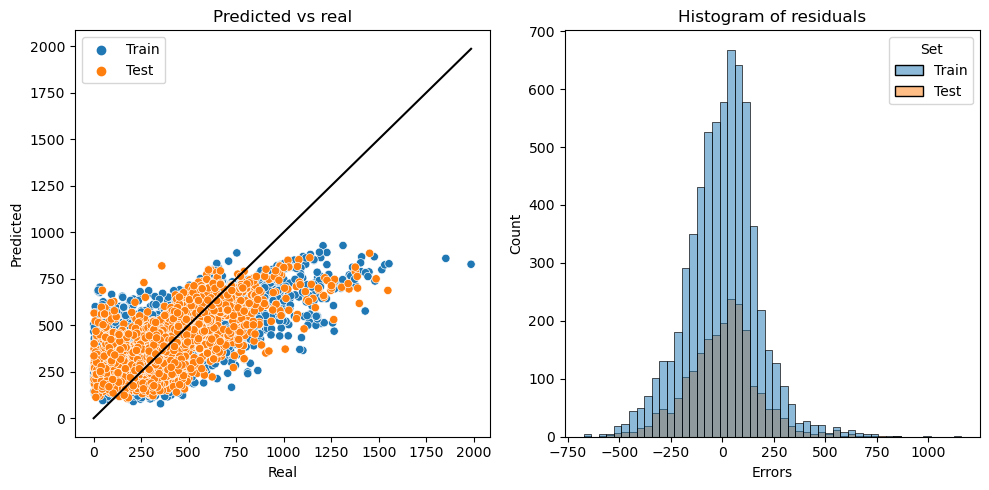

In [396]:
# Plotting predictions vs real

fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(results_df, x="Real", y="Predicted", hue="Set", ax=ax[0])
sns.lineplot(results_df, x="Real", y="Real", color="black", ax=ax[0])
ax[0].set_title("Predicted vs real")
sns.histplot(results_df, x="Errors", bins=50, hue="Set", ax=ax[1])
ax[1].set_title("Histogram of residuals")

plt.tight_layout()
plt.show()

In [397]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
    Function: Calculate the various error metrics for a given set of train and test data prediction splits and organises them into a dataframe for easier visualisation
    Inputs: y_real training data, y_real test data, y_prediction training data, y_prediction test data
    Outputs: Dataframe with metrics column, and errors split by test and training data type. 
    '''

    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test, y_pred_test)

    # Mean squared error
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # Root mean squared error
    RMSE_train = mean_squared_error(y_real_train, y_pred_train, squared=False)
    RMSE_test  = mean_squared_error(y_real_test, y_pred_test, squared=False)

    # R2
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_test, y_pred_test)

    results = {"Metric": ['MAE', 'MSE', 'RMSE', 'R2'], 
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    return results_df

In [398]:
error_metrics_df = error_metrics_report(list(y_train.total_claim_amount.values), list(y_test.total_claim_amount.values), 
                     list(y_train_pred), list(y_test_pred))
display(error_metrics_df)

,Metric,Train,Test
0,MAE,132.78,132.98
1,MSE,31115.05,31339.29
2,RMSE,176.39,177.03
3,R2,0.43,0.44
